## Challenge 
[Click here pour plus de détails](https://www.kaggle.com/c/classification-data-challenge/data)

In [48]:
# import libs
import numpy as np
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_sub = pd.read_csv("submission.csv")
df_train.head()

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,6,23,1,2,1,5,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0


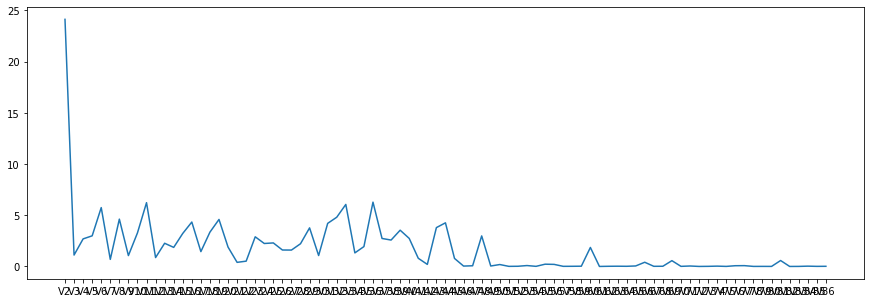

In [109]:
plt.figure(figsize=(15,5))
plt.plot(df_train.iloc[:,1:-1].mean())

Class 0: 3859
Class 1: 248
Proportion: 15.56 : 1


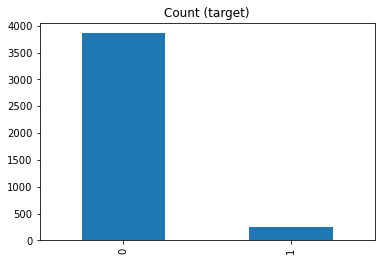

In [86]:
target_count =  df_train.iloc[:,-1].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [88]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [89]:
# Remove 'id' and 'target' columns
labels = df_train.columns[2:-35]

X = df_train[labels]
y = df_train['Buy']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

C:\Users\user\anaconda3\envs\Project\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:23:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       772
           1       0.15      0.08      0.11        50

    accuracy                           0.92       822
   macro avg       0.55      0.53      0.53       822
weighted avg       0.89      0.92      0.90       822



#### Under Sampling


In [90]:
# Class count
count_class_0, count_class_1 = df_train.Buy.value_counts()

# Divide by class
df_class_0 = df_train[df_train['Buy'] == 0]
df_class_1 = df_train[df_train['Buy'] == 1]

Random under-sampling:
0    248
1    248
Name: Buy, dtype: int64


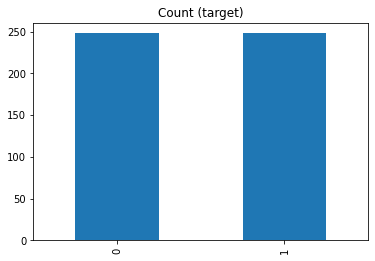

In [91]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Buy.value_counts())

df_test_under.Buy.value_counts().plot(kind='bar', title='Count (target)');

In [92]:
X = df_test_under[labels]
y = df_test_under['Buy']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[15:23:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.56      0.40      0.47        50
           1       0.53      0.68      0.60        50

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.53       100
weighted avg       0.54      0.54      0.53       100



C:\Users\user\anaconda3\envs\Project\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [93]:
from imblearn.over_sampling import SMOTE

X = df_train[labels]
y = df_train['Buy']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print('SMOTE:')
y_sm.value_counts()

SMOTE:


0    3859
1    3859
Name: Buy, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, stratify=y_sm,
                                                    test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[15:23:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\envs\Project\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       772
           1       0.95      0.96      0.96       772

    accuracy                           0.96      1544
   macro avg       0.96      0.96      0.96      1544
weighted avg       0.96      0.96      0.96      1544



In [95]:
df_sub.columns

Index(['Id', 'Predicted'], dtype='object')

In [96]:
labels

Index(['V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
       'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33',
       'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43',
       'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52'],
      dtype='object')

**Submission test**

In [97]:
X_sub = df_test[labels]
y_sub = df_sub['Predicted']

In [98]:
y_pred = model.predict(X_sub)

#accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_sub, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.06      0.11      1715

    accuracy                           0.06      1715
   macro avg       0.50      0.03      0.05      1715
weighted avg       1.00      0.06      0.11      1715



C:\Users\user\anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [107]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Scale Features
scaler = StandardScaler()

X = df_train[labels]
#X = scaler.fit_transform(X)
y = df_train['Buy']

n_dim = 10
pca = PCA(n_components=n_dim)
Xt= pca.fit_transform(X)

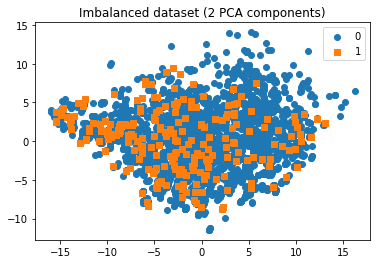

In [108]:
plot_2d_space(Xt, y, 'Imbalanced dataset (2 PCA components)')

In [120]:
df_train[["Id","V2", 'Buy']][:5]

,Id,V2,Buy
0,1,33,0
1,2,37,0
2,3,37,0
3,4,9,0
4,6,23,0


In [121]:
df_test[["Id","V2"]][:5]

,Id,V2
0,5,40
1,14,41
2,16,33
3,26,33
4,28,40


In [119]:
df_sub[:5]

,Id,Predicted
0,5,1
1,14,1
2,16,1
3,26,1
4,28,1
